<img src="./pictures/logo_sizinglab.png" style="float:right; max-width: 60px; display: inline" alt="SizingLab" /></a>

# Evaluation and optimization of a multi-rotor drone

*Written by Marc Budinger (INSA Toulouse), Scott Delbecq (ISAE-SUPAERO) and Félix Pollet (ISAE-SUPAERO), Toulouse, France.*

We will now use the [OpenMDAO framework](https://openmdao.org/) to solve and optimize the configuration. We use here the SLSQP algorithm, a gradient-based optimizer.

In [1]:
import fastoad.api as oad
from utils.plots import *

CONFIGURATION_FILE = './openmdao/multirotor_mdo.yaml'
SOURCE_FILE = './openmdao/problem_inputs_ref.xml'
INPUT_FILE = './openmdao/problem_inputs.xml'
OUTPUT_FILE = './openmdao/problem_outputs.xml'

In [2]:
oad.generate_inputs(CONFIGURATION_FILE, SOURCE_FILE, overwrite=True)

'/home/master22/mae23/d.kota/multirotor_sizing_isae_coa_2023_student_version/openmdao/problem_inputs.xml'

In [3]:
N2_FILE = './openmdao/n2.html'
oad.write_n2(CONFIGURATION_FILE, N2_FILE, overwrite=True)
from IPython.display import IFrame
IFrame(src=N2_FILE, width='100%', height='500px')

In [15]:
oad.variable_viewer(INPUT_FILE)

In [26]:
optim_problem = oad.optimize_problem(CONFIGURATION_FILE, overwrite=True)

Optimization failed after 0.48 seconds


Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: [36.00005003]
            Iterations: 22
            Function evaluations: 120
            Gradient evaluations: 18
Optimization FAILED.
Positive directional derivative for linesearch
-----------------------------------


In [27]:
oad.optimization_viewer(CONFIGURATION_FILE)

/softs/Utils/Jupyterhub3/envs/multirotor/lib/python3.8/site-packages/jupyter_client/session.py:718: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant



In [28]:
# You can compare with reference output file by uncommenting the nextline
# OUTPUT_FILE = './openmdao/problem_outputs_ref.xml'
oad.variable_viewer(OUTPUT_FILE)

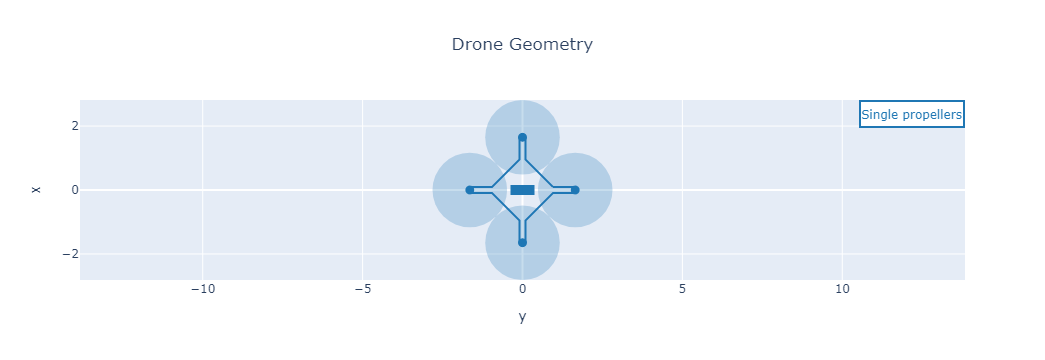

In [29]:
fig = drone_geometry_plot(OUTPUT_FILE, name='Drone MDO')
fig.show()

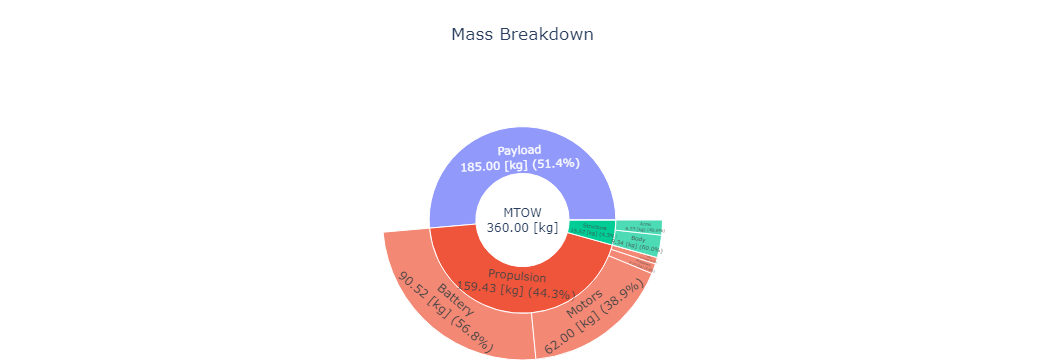

In [30]:
fig = mass_breakdown_sun_plot_drone(OUTPUT_FILE)
fig.show()